### Homework 2 - CNN CIFAR 10 
https://www.tensorflow.org/alpha/tutorials/images/intro_to_cnns

In [1]:
import numpy as np
import pandas as pd

#### Loading Dataset

In [2]:
import os
location =  r"E:\Data\CIFAR10\Original\Train"
files = sorted(os.listdir(location), key=lambda x : int(x[:-5]))
train = [ r"{}\{}".format(location,i) for i in files]

location = r"E:\Data\CIFAR10\Original"
file = "Train_Label.csv"
train_labels = pd.read_csv(r"{}/{}".format(location, file),index_col=0).values

train[:10]

['E:\\Data\\CIFAR10\\Original\\Train\\0.jpeg',
 'E:\\Data\\CIFAR10\\Original\\Train\\1.jpeg',
 'E:\\Data\\CIFAR10\\Original\\Train\\2.jpeg',
 'E:\\Data\\CIFAR10\\Original\\Train\\3.jpeg',
 'E:\\Data\\CIFAR10\\Original\\Train\\4.jpeg',
 'E:\\Data\\CIFAR10\\Original\\Train\\5.jpeg',
 'E:\\Data\\CIFAR10\\Original\\Train\\6.jpeg',
 'E:\\Data\\CIFAR10\\Original\\Train\\7.jpeg',
 'E:\\Data\\CIFAR10\\Original\\Train\\8.jpeg',
 'E:\\Data\\CIFAR10\\Original\\Train\\9.jpeg']

In [3]:
%pylab inline
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

table = [[] for _ in range(10)]
for i in range(len(train)):
    label = train_labels[i, 0]
    table[label].append(i)

Populating the interactive namespace from numpy and matplotlib


C:\Users\ken\AppData\Local\conda\conda\envs\py36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


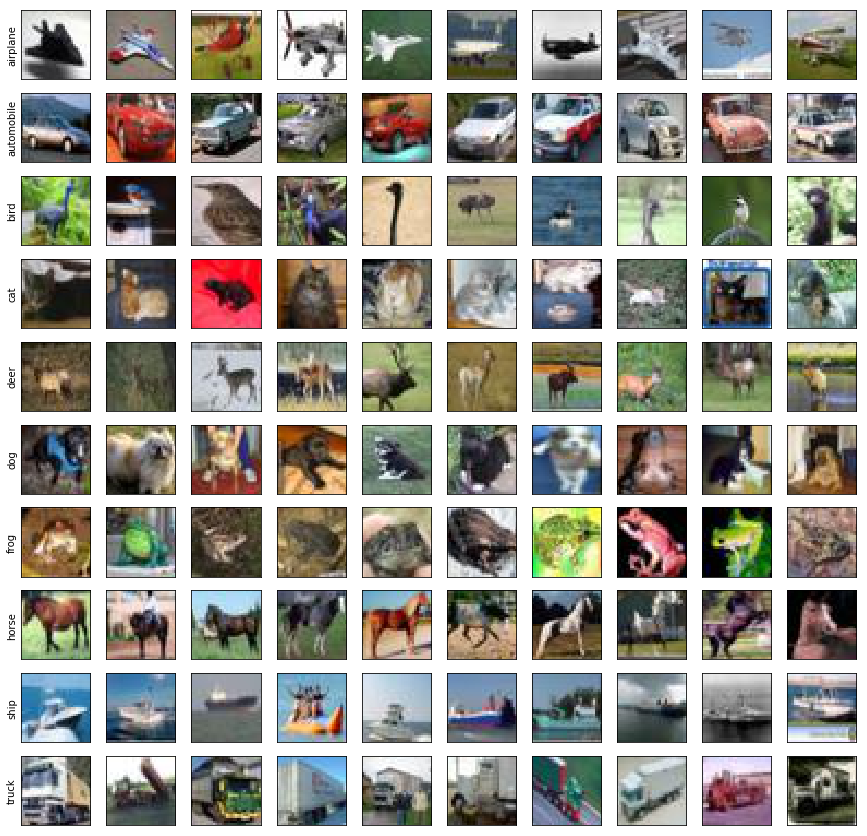

In [4]:
plt.figure(figsize=(15,15))
for class_index in range(10):
    for example_index in range(10):
        plt.subplot(10, 10, class_index * 10 + example_index + 1)
        plt.xticks([])
        plt.yticks([])
        if example_index == 0:
            plt.ylabel(class_names[class_index], rotation=90)
        plt.grid(False)
        plt.imshow(imread(train[table[class_index][example_index]]))
plt.show()

In [5]:
from skimage.io import imread
from skimage.transform import resize
import numpy as np

class CIFAR10Sequence(tf.keras.utils.Sequence):

    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]

        return np.array([
                   imread(file_name)
               for file_name in batch_x])/255, np.array(batch_y)

In [11]:
from sklearn.model_selection import train_test_split
import random

train, validation, train_labels, validation_labels = train_test_split(train, train_labels, test_size= 0.2, random_state= random.randint(0, 100000))

batch_size = 100
train_seq = CIFAR10Sequence(train, train_labels, batch_size)
validation_seq = CIFAR10Sequence(validation, validation_labels, batch_size)

In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks

def baselineModel():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    #Dense Layers and output
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

In [13]:
model = baselineModel()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [14]:
callback = [callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=1e-2,
        patience = 5,
        verbose=1)]

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#model.load_weights('./checkpoints/my_checkpoint')
model.fit_generator(train_seq, validation_data=validation_seq, epochs=100, callbacks=callback)

model.save_weights("./checkpoints/my_checkpoint")

Epoch 1/100
256/256 [==============================] - 14s 55ms/step - loss: 1.7759 - accuracy: 0.3465 - val_loss: 1.5285 - val_accuracy: 0.4255
Epoch 2/100
256/256 [==============================] - 12s 46ms/step - loss: 1.4351 - accuracy: 0.4796 - val_loss: 1.4003 - val_accuracy: 0.4945
Epoch 3/100
256/256 [==============================] - 11s 45ms/step - loss: 1.2911 - accuracy: 0.5399 - val_loss: 1.2749 - val_accuracy: 0.5462
Epoch 4/100
256/256 [==============================] - 11s 44ms/step - loss: 1.1946 - accuracy: 0.5753 - val_loss: 1.2322 - val_accuracy: 0.5627
Epoch 5/100
256/256 [==============================] - 12s 45ms/step - loss: 1.1188 - accuracy: 0.6084 - val_loss: 1.1990 - val_accuracy: 0.5778
Epoch 6/100
256/256 [==============================] - 12s 45ms/step - loss: 1.0502 - accuracy: 0.6309 - val_loss: 1.1338 - val_accuracy: 0.6062
Epoch 7/100
256/256 [==============================] - 12s 45ms/step - loss: 0.9982 - accuracy: 0.6479 - val_loss: 1.0978 - val_ac

Model stopped learning at 65% validation accuracy. Overfitted on training by a lot

#### Image Augmentation

https://www.reddit.com/r/MachineLearning/comments/axq6lu/p_albumentations_an_image_augmentation_library/
https://github.com/albu/albumentations/blob/master/notebooks/example.ipynb

pip install -U albumentations

In [1]:
from urllib.request import urlopen
import numpy as np
import cv2
from matplotlib import pyplot as plt

from albumentations import (
    HorizontalFlip,
    Transpose, ShiftScaleRotate, Resize, RandomSizedCrop, RandomCrop, Rotate
)

In [2]:
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def show_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.show()
    
def augment(aug, image):
    image = aug(image=image)['image']
    return image

Example Image Augmentations

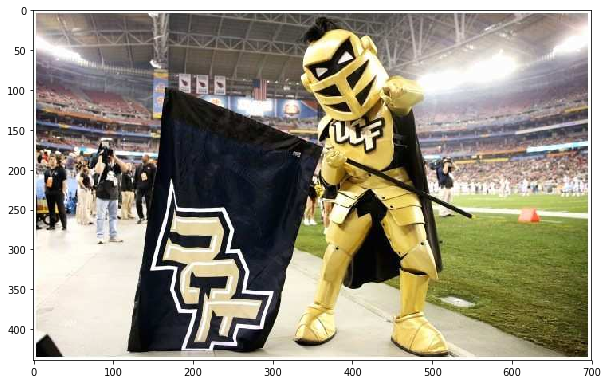

In [5]:
image = download_image('https://therunnersports.com/wp-content/uploads/2019/02/univ-of-central-florida-football-admirable-ucf-knights-of-univ-of-central-florida-football.jpg')
show_image(image)

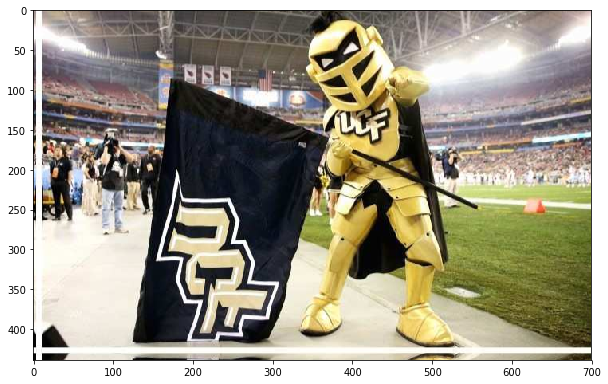

In [6]:
#p (float) – probability of applying the transform. Default: 0.5.
aug = ShiftScaleRotate(rotate_limit=0, scale_limit=0 ,p= 1)
a = augment(aug,image)
show_image(a) 

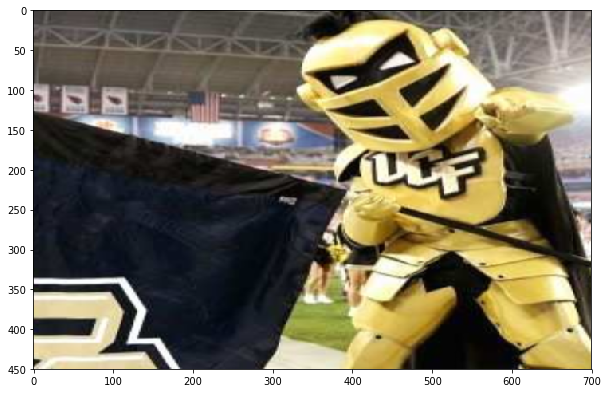

In [7]:
#p (float) – probability of applying the transform. Default: 0.5.
aug = RandomSizedCrop(min_max_height=(300,400), height=450, width=700,p= 1)
show_image(augment(aug,a)) 

In [40]:
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import pandas as pd
import tensorflow as tf


class CIFAR10AugmentationAndResize(tf.keras.utils.Sequence):
    #Default size is 96 because it is one of the default train image size of mobilenetv2
    def __init__(self, x_set, y_set, batch_size, 
                 augmentations = True,
                 resize = False,
                 height = 32, width = 32,
                 pShiftScaleRotate = .2, pRandomSizedCrop = .2):
        self.resize = resize
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.pShiftScaleRotate = pShiftScaleRotate
        self.pRandomSizedCrop = pRandomSizedCrop      
        self.height = height
        self.width = width
        self.augmentations = augmentations

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        
        images = [imread(file_name) for file_name in batch_x]
        
        if(self.resize):
            resize = Resize(height=self.height, width=self.width)
        rotate = Rotate()
        #shiftScaleRotate = ShiftScaleRotate(p=self.pShiftScaleRotate)
        randomSizedCrop = RandomSizedCrop(min_max_height=(self.height - self.height * .25 ,self.height), height=self.height, width=self.width, p=self.pRandomSizedCrop)
        horizontalFlip = HorizontalFlip()
        
        for i in range(len(images)):    
            if(self.resize):
                images[i] = augment(resize ,images[i])
            
            if(self.augmentations):
                images[i] = augment(rotate ,images[i])
                images[i] = augment(horizontalFlip ,images[i])
                images[i] = augment(randomSizedCrop ,images[i])
        
        return np.array(images)/255, np.array(batch_y)

### Load Data

In [41]:
import os
location =  r"E:\Data\CIFAR10\Original\Train"
files = sorted(os.listdir(location), key=lambda x : int(x[:-5]))
train = [ r"{}\{}".format(location,i) for i in files]

location = r"E:\Data\CIFAR10\Original"
file = "Train_Label.csv"
train_labels = pd.read_csv(r"{}/{}".format(location, file),index_col=0).values

In [42]:
from sklearn.model_selection import train_test_split
import random

train, validation, train_labels, validation_labels = train_test_split(train, train_labels, test_size= 0.2, random_state= random.randint(0, 100000))

batch_size = 32
train_seq = CIFAR10AugmentationAndResize(train, train_labels, batch_size)
validation_seq = CIFAR10AugmentationAndResize(validation, validation_labels, batch_size, augmentations=False)

Populating the interactive namespace from numpy and matplotlib
airplane


C:\Users\ken\AppData\Local\conda\conda\envs\py36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'resize', 'imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


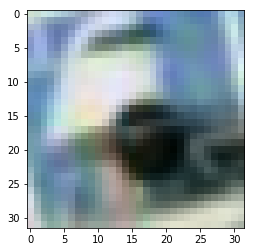

In [43]:
%pylab inline
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

example, example_label = train_seq.__getitem__(0)
plt.imshow(example[0])
print(class_names[example_label[0,0]])

airplane


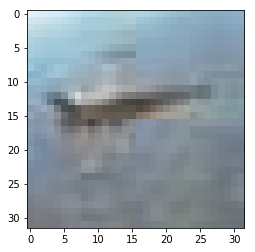

In [44]:
example, example_label = validation_seq.__getitem__(0)
plt.imshow(example[0])
print(class_names[example_label[0,0]])

#### Architecture 2
This one has image augmentation

In [59]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
import tensorflow.keras as keras

In [60]:
IMG_SIZE = 32
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
    
model = tf.keras.Sequential([tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=IMG_SHAPE),
                               tf.keras.layers.MaxPooling2D((2,2)),
                               tf.keras.layers.Conv2D(32,(3,3),  activation='relu'),
                               tf.keras.layers.MaxPooling2D((2,2)),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(64,  activation='relu'),
                               tf.keras.layers.Dense(10,  activation='softmax')])

model.build(input_shape=IMG_SHAPE)

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                73792     
_________________________________________________________________
dense_27 (Dense)             (None, 10)              

In [63]:
callback = [callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=1e-3,
        patience = 5,
        verbose=1,
        restore_best_weights=True)]

#model.load_weights('./checkpoints/my_checkpoint')
history = model.fit_generator(train_seq, validation_data=validation_seq, epochs= 100, shuffle=True, callbacks=callback)

model.save_weights("./checkpoints/architecture2")

Epoch 1/100
1250/1250 [==============================] - 21s 17ms/step - loss: 1.4917 - accuracy: 0.4697 - val_loss: 1.3341 - val_accuracy: 0.5275
Epoch 2/100
1250/1250 [==============================] - 21s 17ms/step - loss: 1.4342 - accuracy: 0.4919 - val_loss: 1.3052 - val_accuracy: 0.5459
Epoch 3/100
1250/1250 [==============================] - 21s 17ms/step - loss: 1.3944 - accuracy: 0.5039 - val_loss: 1.2248 - val_accuracy: 0.5678
Epoch 4/100
1250/1250 [==============================] - 21s 17ms/step - loss: 1.3722 - accuracy: 0.5150 - val_loss: 1.1870 - val_accuracy: 0.5847
Epoch 5/100
1250/1250 [==============================] - 21s 17ms/step - loss: 1.3447 - accuracy: 0.5212 - val_loss: 1.2075 - val_accuracy: 0.5721
Epoch 6/100
1250/1250 [==============================] - 21s 17ms/step - loss: 1.3202 - accuracy: 0.5320 - val_loss: 1.2194 - val_accuracy: 0.5768
Epoch 7/100
1250/1250 [==============================] - 21s 17ms/step - loss: 1.3100 - accuracy: 0.5382 - val_loss: 1

Text(0.5, 1.0, 'Training and Validation Accuracy')

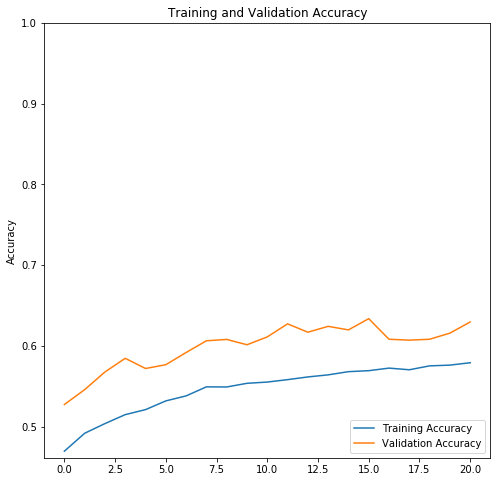

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

### architecture 3

In [77]:
IMG_SIZE = 32
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
    
model = tf.keras.Sequential([tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=IMG_SHAPE),
                               tf.keras.layers.MaxPooling2D((2,2)),
                               tf.keras.layers.BatchNormalization(axis=1),
                               tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                               tf.keras.layers.MaxPooling2D((2,2)),
                               tf.keras.layers.BatchNormalization(axis=1),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(64, activation='relu'),
                               tf.keras.layers.BatchNormalization(axis=1),
                               tf.keras.layers.Dropout(.2),
                               tf.keras.layers.Dense(10, activation='softmax')])

model.build(input_shape=IMG_SHAPE)

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
batch_normalization_v2_24 (B (None, 15, 15, 64)        60        
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
batch_normalization_v2_25 (B (None, 6, 6, 32)          24        
_________________________________________________________________
flatten_13 (Flatten)         (None, 1152)            

In [78]:
class SaveModel(callbacks.Callback):
    def __init__(self):
        super(SaveModel, self).__init__()
        self.bestloss = 999
        
    def on_epoch_end(self, epoch, logs={}):
        val_loss, val_acc = logs['val_loss'], logs['val_accuracy']
        
        if (self.bestloss > val_loss) :
            self.bestloss = val_loss
            print("Updating best model")
            self.model.save("architecture3.h5", overwrite=True)
        return

In [81]:
callback = [SaveModel()]
#model.load_weights('./checkpoints/my_checkpoint')
history = model.fit_generator(train_seq, validation_data=validation_seq, epochs=50, shuffle=True, callbacks=callback)


Epoch 1/50
1250/1250 [==============================] - 24s 19ms/step - loss: 1.7638 - accuracy: 0.3650 - val_loss: 1.6855 - val_accuracy: 0.4022
Epoch 2/50
1250/1250 [==============================] - 22s 17ms/step - loss: 1.5719 - accuracy: 0.4409 - val_loss: 1.4238 - val_accuracy: 0.4986
Epoch 3/50
1250/1250 [==============================] - 22s 18ms/step - loss: 1.5127 - accuracy: 0.4647 - val_loss: 1.2670 - val_accuracy: 0.5643
Epoch 4/50
1250/1250 [==============================] - 22s 17ms/step - loss: 1.4766 - accuracy: 0.4784 - val_loss: 1.3848 - val_accuracy: 0.5175
Epoch 5/50
1250/1250 [==============================] - 24s 19ms/step - loss: 1.4411 - accuracy: 0.4895 - val_loss: 1.2228 - val_accuracy: 0.5670
Epoch 6/50
1250/1250 [==============================] - 22s 18ms/step - loss: 1.4249 - accuracy: 0.4957 - val_loss: 1.2018 - val_accuracy: 0.5755
Epoch 7/50
1250/1250 [==============================] - 22s 17ms/step - loss: 1.3997 - accuracy: 0.5044 - val_loss: 1.4570 -

1250/1250 [==============================] - 24s 19ms/step - loss: 1.1505 - accuracy: 0.6004 - val_loss: 0.9122 - val_accuracy: 0.6839
Epoch 46/50
1250/1250 [==============================] - 22s 17ms/step - loss: 1.1554 - accuracy: 0.5986 - val_loss: 0.9087 - val_accuracy: 0.6822
Epoch 47/50
1250/1250 [==============================] - 22s 17ms/step - loss: 1.1541 - accuracy: 0.5972 - val_loss: 0.9076 - val_accuracy: 0.6859
Epoch 48/50
1250/1250 [==============================] - 21s 17ms/step - loss: 1.1534 - accuracy: 0.5998 - val_loss: 0.9093 - val_accuracy: 0.6772
Epoch 49/50
1250/1250 [==============================] - 22s 18ms/step - loss: 1.1434 - accuracy: 0.5993 - val_loss: 1.0117 - val_accuracy: 0.6389
Epoch 50/50
1250/1250 [==============================] - 22s 18ms/step - loss: 1.1428 - accuracy: 0.6007 - val_loss: 1.0013 - val_accuracy: 0.6538


Text(0.5, 1.0, 'Training and Validation Accuracy')

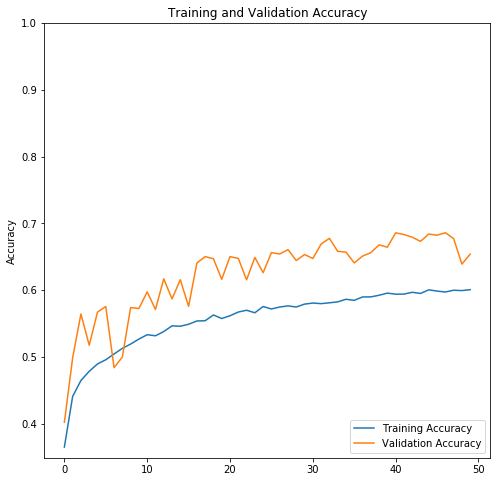

In [82]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

### Architecture 4

In [106]:
IMG_SIZE = 32
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
    
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=IMG_SHAPE),
                               tf.keras.layers.MaxPooling2D((2,2)),
                               tf.keras.layers.BatchNormalization(axis=1),
                               tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                               tf.keras.layers.MaxPooling2D((2,2)),
                               tf.keras.layers.BatchNormalization(axis=1),
                               tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                               tf.keras.layers.MaxPooling2D((2,2)),
                               tf.keras.layers.BatchNormalization(axis=1),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(128, activation='relu'),
                               tf.keras.layers.BatchNormalization(axis=1),
                               tf.keras.layers.Dropout(.2),
                               tf.keras.layers.Dense(32, activation='relu'),
                               tf.keras.layers.BatchNormalization(axis=1),
                               tf.keras.layers.Dropout(.2),
                               tf.keras.layers.Dense(10, activation='softmax')])

model.build(input_shape=IMG_SHAPE)

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
batch_normalization_v2_46 (B (None, 15, 15, 128)       60        
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 13, 13, 64)        73792     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_v2_47 (B (None, 6, 6, 64)          24        
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 4, 4, 32)        

In [85]:
class SaveModel(callbacks.Callback):
    def __init__(self):
        super(SaveModel, self).__init__()
        self.bestloss = 999
        
    def on_epoch_end(self, epoch, logs={}):
        val_loss, val_acc = logs['val_loss'], logs['val_accuracy']
        
        if (self.bestloss > val_loss) :
            self.bestloss = val_loss
            print("Updating best model")
            self.model.save("architecture4.h5", overwrite=True)
        return

In [86]:
callback = [SaveModel()]
#model.load_weights('./checkpoints/my_checkpoint')
history = model.fit_generator(train_seq, validation_data=validation_seq, epochs=50, shuffle=True, callbacks=callback)


Epoch 1/50
1250/1250 [==============================] - 28s 23ms/step - loss: 1.9456 - accuracy: 0.2964 - val_loss: 2.8407 - val_accuracy: 0.1418
Epoch 2/50
1250/1250 [==============================] - 22s 18ms/step - loss: 1.6720 - accuracy: 0.3990 - val_loss: 1.6178 - val_accuracy: 0.4358
Epoch 3/50
1250/1250 [==============================] - 22s 18ms/step - loss: 1.5879 - accuracy: 0.4292 - val_loss: 1.3861 - val_accuracy: 0.4986
Epoch 4/50
1250/1250 [==============================] - 22s 18ms/step - loss: 1.5391 - accuracy: 0.4500 - val_loss: 1.4181 - val_accuracy: 0.4899
Epoch 5/50
1250/1250 [==============================] - 22s 18ms/step - loss: 1.4943 - accuracy: 0.4656 - val_loss: 1.3022 - val_accuracy: 0.5317
Epoch 6/50
1250/1250 [==============================] - 22s 18ms/step - loss: 1.4635 - accuracy: 0.4825 - val_loss: 1.3240 - val_accuracy: 0.5278
Epoch 7/50
1250/1250 [==============================] - 22s 18ms/step - loss: 1.4265 - accuracy: 0.4999 - val_loss: 1.2613 -

1250/1250 [==============================] - 22s 18ms/step - loss: 1.1432 - accuracy: 0.6067 - val_loss: 0.9044 - val_accuracy: 0.6807
Epoch 46/50
1250/1250 [==============================] - 22s 18ms/step - loss: 1.1367 - accuracy: 0.6068 - val_loss: 0.9706 - val_accuracy: 0.6578
Epoch 47/50
1250/1250 [==============================] - 22s 18ms/step - loss: 1.1352 - accuracy: 0.6092 - val_loss: 0.9341 - val_accuracy: 0.6779
Epoch 48/50
1250/1250 [==============================] - 22s 18ms/step - loss: 1.1335 - accuracy: 0.6098 - val_loss: 0.9268 - val_accuracy: 0.6813
Epoch 49/50
1250/1250 [==============================] - 22s 18ms/step - loss: 1.1326 - accuracy: 0.6098 - val_loss: 0.8881 - val_accuracy: 0.6878
Epoch 50/50
1250/1250 [==============================] - 22s 18ms/step - loss: 1.1300 - accuracy: 0.6097 - val_loss: 1.0638 - val_accuracy: 0.6344


Text(0.5, 1.0, 'Training and Validation Accuracy')

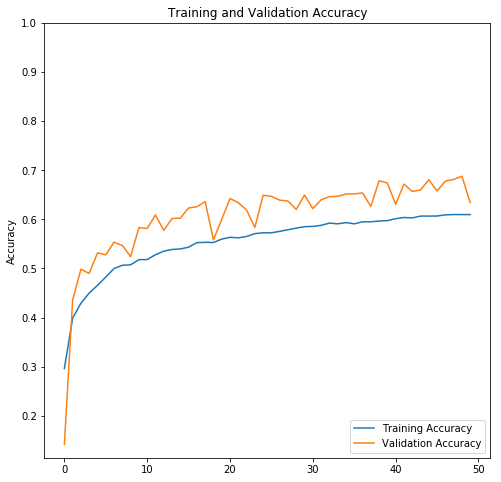

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

### architecture 5
based on resnet
https://www.tensorflow.org/alpha/tutorials/eager/custom_layers



In [176]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, (1, 1), input_shape=(32, 32, 3)),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Conv2D(16, 1,padding='same'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Conv2D(32, (3, 3)),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.MaxPooling2D(2,2),
                               tf.keras.layers.ReLU(),
                               tf.keras.layers.Conv2D(64, (1, 1)),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Conv2D(32, 1,padding='same'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Conv2D(64, (3, 3)),
                               tf.keras.layers.BatchNormalization(),   
                               tf.keras.layers.MaxPooling2D(2,2),
                               tf.keras.layers.ReLU(),
                               tf.keras.layers.Conv2D(128, (1, 1)),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Conv2D(64, 1,padding='same'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Conv2D(128, (3, 3)),
                               tf.keras.layers.BatchNormalization(),  
                               tf.keras.layers.MaxPooling2D(2,2),
                               tf.keras.layers.ReLU(),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(128, activation='relu'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Dropout(.2),
                               tf.keras.layers.Dense(64, activation='relu'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Dropout(.2),
                               tf.keras.layers.Dense(10, activation='softmax')
                             ])
    
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_369 (Conv2D)          (None, 32, 32, 32)        128       
_________________________________________________________________
batch_normalization_v2_312 ( (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_370 (Conv2D)          (None, 32, 32, 16)        528       
_________________________________________________________________
batch_normalization_v2_313 ( (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_371 (Conv2D)          (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_v2_314 ( (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_136 (MaxPoolin (None, 15, 15, 32)      

In [190]:
##### batch_size = 32
train_seq = CIFAR10AugmentationAndResize(train, train_labels, batch_size)
validation_seq = CIFAR10AugmentationAndResize(validation, validation_labels, batch_size, augmentations=False)

class SaveModel(callbacks.Callback):
    def __init__(self, filename):
        super(SaveModel, self).__init__()
        self.bestloss = 99999
        self.filename = filename
        
    def on_epoch_end(self, epoch, logs={}):
        val_loss, val_acc = logs['val_loss'], logs['val_accuracy']
        
        if(epoch % 50 == 0):
            self.model.save("checkpoint{}_{}".format(epoch // 50,self.filename), overwrite=True)
        
        if (self.bestloss > val_loss) :
            self.bestloss = val_loss
            print("\nUpdating best model")
            self.model.save("{}".format(self.filename), overwrite=True)
        return

In [187]:
callback = [SaveModel("architecture6.h5")]
#model.load_weights('./checkpoints/my_checkpoint')
history = model.fit_generator(train_seq, validation_data=validation_seq, epochs=200, shuffle=True, callbacks=callback)

Epoch 1/200
1249/1250 [============================>.] - ETA: 0s - loss: 1.2509 - accuracy: 0.5646
Updating best model
1250/1250 [==============================] - 27s 22ms/step - loss: 1.2508 - accuracy: 0.5647 - val_loss: 1.0491 - val_accuracy: 0.6346
Epoch 2/200
1249/1250 [============================>.] - ETA: 0s - loss: 1.2257 - accuracy: 0.5760
Updating best model
1250/1250 [==============================] - 28s 22ms/step - loss: 1.2254 - accuracy: 0.5760 - val_loss: 0.9947 - val_accuracy: 0.6559
Epoch 3/200
1249/1250 [============================>.] - ETA: 0s - loss: 1.1987 - accuracy: 0.5822
Updating best model
1250/1250 [==============================] - 27s 22ms/step - loss: 1.1987 - accuracy: 0.5822 - val_loss: 0.9443 - val_accuracy: 0.6716
Epoch 4/200
1249/1250 [============================>.] - ETA: 0s - loss: 1.1786 - accuracy: 0.5931
Updating best model
1250/1250 [==============================] - 27s 22ms/step - loss: 1.1783 - accuracy: 0.5932 - val_loss: 0.9330 - val_a

Epoch 43/200
1247/1250 [============================>.] - ETA: 0s - loss: 0.9043 - accuracy: 0.6899
Updating best model
1250/1250 [==============================] - 27s 22ms/step - loss: 0.9046 - accuracy: 0.6898 - val_loss: 0.6915 - val_accuracy: 0.7586
Epoch 44/200
1250/1250 [==============================] - 28s 22ms/step - loss: 0.9050 - accuracy: 0.6917 - val_loss: 0.6923 - val_accuracy: 0.7618
Epoch 45/200
1249/1250 [============================>.] - ETA: 0s - loss: 0.9063 - accuracy: 0.6900
Updating best model
1250/1250 [==============================] - 27s 22ms/step - loss: 0.9062 - accuracy: 0.6899 - val_loss: 0.6904 - val_accuracy: 0.7569
Epoch 46/200
1250/1250 [==============================] - 27s 22ms/step - loss: 0.9019 - accuracy: 0.6898 - val_loss: 0.6974 - val_accuracy: 0.7577
Epoch 47/200
1250/1250 [==============================] - 28s 22ms/step - loss: 0.8951 - accuracy: 0.6929 - val_loss: 0.7211 - val_accuracy: 0.7520
Epoch 48/200
1250/1250 [======================

1250/1250 [==============================] - 28s 22ms/step - loss: 0.8104 - accuracy: 0.7250 - val_loss: 0.6689 - val_accuracy: 0.7689
Epoch 94/200
1250/1250 [==============================] - 28s 22ms/step - loss: 0.8153 - accuracy: 0.7207 - val_loss: 0.6548 - val_accuracy: 0.7703
Epoch 95/200
1250/1250 [==============================] - 27s 22ms/step - loss: 0.8102 - accuracy: 0.7221 - val_loss: 0.6632 - val_accuracy: 0.7736
Epoch 96/200
1250/1250 [==============================] - 27s 22ms/step - loss: 0.8083 - accuracy: 0.7251 - val_loss: 0.6621 - val_accuracy: 0.7725
Epoch 97/200
1250/1250 [==============================] - 27s 22ms/step - loss: 0.8137 - accuracy: 0.7228 - val_loss: 0.6650 - val_accuracy: 0.7690
Epoch 98/200
1250/1250 [==============================] - 27s 22ms/step - loss: 0.8180 - accuracy: 0.7208 - val_loss: 0.6653 - val_accuracy: 0.7713
Epoch 99/200
1250/1250 [==============================] - 27s 22ms/step - loss: 0.8026 - accuracy: 0.7238 - val_loss: 0.6656 

1250/1250 [==============================] - 28s 22ms/step - loss: 0.7697 - accuracy: 0.7366 - val_loss: 0.6575 - val_accuracy: 0.7774
Epoch 145/200
1250/1250 [==============================] - 27s 22ms/step - loss: 0.7683 - accuracy: 0.7383 - val_loss: 0.6568 - val_accuracy: 0.7732
Epoch 146/200
1250/1250 [==============================] - 28s 22ms/step - loss: 0.7666 - accuracy: 0.7398 - val_loss: 0.6529 - val_accuracy: 0.7727
Epoch 147/200
1250/1250 [==============================] - 28s 22ms/step - loss: 0.7684 - accuracy: 0.7390 - val_loss: 0.6406 - val_accuracy: 0.7783
Epoch 148/200
1250/1250 [==============================] - 28s 22ms/step - loss: 0.7661 - accuracy: 0.7387 - val_loss: 0.6579 - val_accuracy: 0.7750
Epoch 149/200
1250/1250 [==============================] - 28s 22ms/step - loss: 0.7625 - accuracy: 0.7382 - val_loss: 0.6509 - val_accuracy: 0.7768
Epoch 150/200
1250/1250 [==============================] - 28s 22ms/step - loss: 0.7710 - accuracy: 0.7393 - val_loss: 0

1250/1250 [==============================] - 27s 22ms/step - loss: 0.7404 - accuracy: 0.7470 - val_loss: 0.6476 - val_accuracy: 0.7840
Epoch 198/200
1250/1250 [==============================] - 28s 22ms/step - loss: 0.7394 - accuracy: 0.7493 - val_loss: 0.6522 - val_accuracy: 0.7804
Epoch 199/200
1250/1250 [==============================] - 28s 22ms/step - loss: 0.7522 - accuracy: 0.7426 - val_loss: 0.6427 - val_accuracy: 0.7766
Epoch 200/200
1250/1250 [==============================] - 27s 22ms/step - loss: 0.7409 - accuracy: 0.7490 - val_loss: 0.6375 - val_accuracy: 0.7832


Text(0.5, 1.0, 'Training and Validation Accuracy')

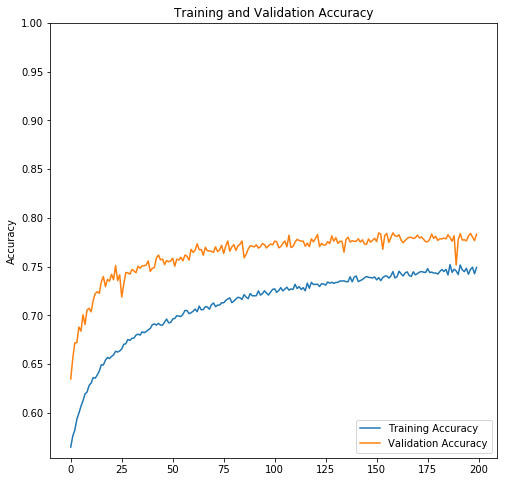

In [188]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

### Another architecture

In [213]:
model = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(32, (1, 1), input_shape=(32, 32, 3)),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Conv2D(16, 1,padding='same'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Conv2D(32, (3, 3)),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.ReLU(),
                             
                               tf.keras.layers.Conv2D(64, (1, 1)),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Conv2D(32, 1,padding='same'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Conv2D(64, (3, 3)),
                               tf.keras.layers.BatchNormalization(),   
                               tf.keras.layers.ReLU(),
                               tf.keras.layers.MaxPooling2D((2,2)),

                               tf.keras.layers.Conv2D(128, (1, 1)),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Conv2D(64, 1,padding='same'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Conv2D(128, (3, 3)),
                               tf.keras.layers.BatchNormalization(),   
                               tf.keras.layers.ReLU(),
    
                               tf.keras.layers.Conv2D(524, (1, 1)),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Conv2D(128, 1,padding='same'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Conv2D(524, (3, 3)),
                               tf.keras.layers.BatchNormalization(),   
                               tf.keras.layers.ReLU(),
                               tf.keras.layers.MaxPooling2D((2,2)),
    
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(128, activation='relu'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Dropout(.2),
                               tf.keras.layers.Dense(64, activation='relu'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Dropout(.2),
                               tf.keras.layers.Dense(10, activation='softmax')
                             ])
    
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_585 (Conv2D)          (None, 32, 32, 32)        128       
_________________________________________________________________
batch_normalization_v2_570 ( (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_586 (Conv2D)          (None, 32, 32, 16)        528       
_________________________________________________________________
batch_normalization_v2_571 ( (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_587 (Conv2D)          (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_v2_572 ( (None, 30, 30, 32)        128       
_________________________________________________________________
re_lu_204 (ReLU)             (None, 30, 30, 32)      

In [214]:
callback = [SaveModel("architecture7.h5")]
#model.load_weights('./checkpoints/my_checkpoint')
history = model.fit_generator(train_seq, validation_data=validation_seq, epochs=100, shuffle=True, callbacks=callback)

Epoch 1/100
1249/1250 [============================>.] - ETA: 0s - loss: 1.8266 - accuracy: 0.3452
Updating best model
1250/1250 [==============================] - 94s 75ms/step - loss: 1.8263 - accuracy: 0.3453 - val_loss: 1.4482 - val_accuracy: 0.4815
Epoch 2/100
1249/1250 [============================>.] - ETA: 0s - loss: 1.5112 - accuracy: 0.4608
Updating best model
1250/1250 [==============================] - 39s 31ms/step - loss: 1.5111 - accuracy: 0.4609 - val_loss: 1.3571 - val_accuracy: 0.5213
Epoch 3/100
1249/1250 [============================>.] - ETA: 0s - loss: 1.3806 - accuracy: 0.5132
Updating best model
1250/1250 [==============================] - 39s 31ms/step - loss: 1.3805 - accuracy: 0.5133 - val_loss: 1.1022 - val_accuracy: 0.6046
Epoch 4/100
1249/1250 [============================>.] - ETA: 0s - loss: 1.3087 - accuracy: 0.5389
Updating best model
1250/1250 [==============================] - 39s 32ms/step - loss: 1.3088 - accuracy: 0.5389 - val_loss: 1.0423 - val_a

1250/1250 [==============================] - 40s 32ms/step - loss: 0.7272 - accuracy: 0.7539 - val_loss: 0.6137 - val_accuracy: 0.7895
Epoch 39/100
1250/1250 [==============================] - 40s 32ms/step - loss: 0.7278 - accuracy: 0.7530 - val_loss: 0.5998 - val_accuracy: 0.7936
Epoch 40/100
1250/1250 [==============================] - 39s 32ms/step - loss: 0.7171 - accuracy: 0.7565 - val_loss: 0.6013 - val_accuracy: 0.7921
Epoch 41/100
1250/1250 [==============================] - 40s 32ms/step - loss: 0.7131 - accuracy: 0.7567 - val_loss: 0.6049 - val_accuracy: 0.7932
Epoch 42/100
1249/1250 [============================>.] - ETA: 0s - loss: 0.7003 - accuracy: 0.7631
Updating best model
1250/1250 [==============================] - 40s 32ms/step - loss: 0.7003 - accuracy: 0.7630 - val_loss: 0.5915 - val_accuracy: 0.8018
Epoch 43/100
1250/1250 [==============================] - 40s 32ms/step - loss: 0.6968 - accuracy: 0.7645 - val_loss: 0.6048 - val_accuracy: 0.7967
Epoch 44/100
1249/

1250/1250 [==============================] - 40s 32ms/step - loss: 0.5371 - accuracy: 0.8200 - val_loss: 0.6260 - val_accuracy: 0.7999
Epoch 91/100
1250/1250 [==============================] - 40s 32ms/step - loss: 0.5452 - accuracy: 0.8174 - val_loss: 0.6066 - val_accuracy: 0.8038
Epoch 92/100
1250/1250 [==============================] - 40s 32ms/step - loss: 0.5372 - accuracy: 0.8191 - val_loss: 0.6135 - val_accuracy: 0.8001
Epoch 93/100
1250/1250 [==============================] - 39s 32ms/step - loss: 0.5333 - accuracy: 0.8196 - val_loss: 0.5944 - val_accuracy: 0.8052
Epoch 94/100
1250/1250 [==============================] - 40s 32ms/step - loss: 0.5358 - accuracy: 0.8218 - val_loss: 0.5985 - val_accuracy: 0.8064
Epoch 95/100
1250/1250 [==============================] - 39s 31ms/step - loss: 0.5326 - accuracy: 0.8203 - val_loss: 0.5973 - val_accuracy: 0.8026
Epoch 96/100
1250/1250 [==============================] - 39s 31ms/step - loss: 0.5298 - accuracy: 0.8220 - val_loss: 0.6118 

Text(0.5, 1.0, 'Training and Validation Accuracy')

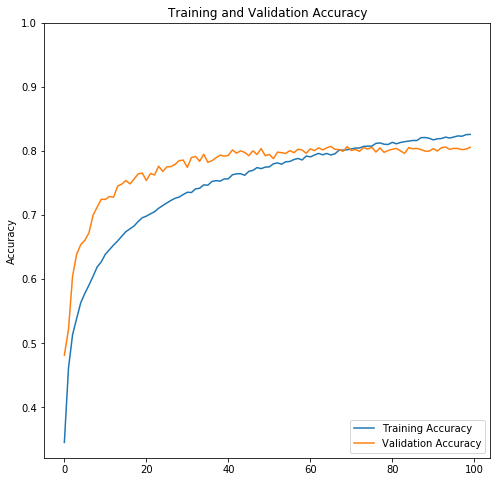

In [215]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

### Evaluate on Test Set

In [216]:
import os
location =  r"E:\Data\CIFAR10\Original\Test"
files = sorted(os.listdir(location), key=lambda x : int(x[:-5]))
test = [ r"{}\{}".format(location,i) for i in files]

location = r"E:\Data\CIFAR10\Original"
file = "Test_Label.csv"
test_labels = pd.read_csv(r"{}/{}".format(location, file),index_col=0).values

from sklearn.model_selection import train_test_split
import random

batch_size = 32
test_seq = CIFAR10AugmentationAndResize(test, test_labels, batch_size,height=96,augmentations=False)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

model.load_weights("architecture7.h5")

model.evaluate_generator(test_seq)

Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_585 (Conv2D)          (None, 32, 32, 32)        128       
_________________________________________________________________
batch_normalization_v2_570 ( (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_586 (Conv2D)          (None, 32, 32, 16)        528       
_________________________________________________________________
batch_normalization_v2_571 ( (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_587 (Conv2D)          (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_v2_572 ( (None, 30, 30, 32)        128       
_________________________________________________________________
re_lu_204 (ReLU)             (None, 30, 30, 32)      

[0.594023482439617, 0.7998]

79.98% score